# Structure Factor for Hard-Sphere Binary Mixtures

In this code, I make use of the results from  J. Chem. Phys. 52, 4559 (1970); https://doi.org/10.1063/1.1673684

The referenced equations are those from the paper.

In [2]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt

In [59]:
etas = np.array([0.2, 0.3])
diameter = np.array([1.0, 3.0])
density = (6.0 / pi) * etas / diameter**3

In [61]:
# Equation 42
xi2 = (pi / 6.0) * np.sum(density * diameter**2)
xi3 = (pi / 6.0) * np.sum(density * diameter**3)

In [62]:
# Equations 40 and 41
a = (1.0 - xi3 + 3.0 * diameter * xi2) / (1.0 - xi3)**2
b = (-3.0) * diameter**2 * xi2 / (2.0 * (1.0 - xi3)**2)

In [63]:
def calculate_Q(a, b, rho_alpha, rho_beta, R_alpha, R_beta, k):
    I = np.identity(2)
    densities_factor = 2.0 * pi * np.sqrt(rho_alpha * rho_beta)
    R = 0.5 * (R_alpha + R_beta)
    S = 0.5 * (R_alpha - R_beta)
    term1 = np.cos(k * R) + np.sin(k * R) * 1.0j
    term2 = ((a / ((k**3) * 2.0j)) * (k * R * 2.0j - 2.0) + (b / k**2))
    term3 = np.cos(k * S) + np.sin(k * S) * 1.0j
    term4 = (a / ((k**3) * 2.0j)) * ((k * S)**2 + k * S * 2.0j - 2.0)
    term5 = (b / k**2) * (1.0 - k * S * 1.0j)
    term6 = (a * R**2 + 2.0 * b * R) / (k * 2.0j)
    
    return I - densities_factor * (term1 * term2 - term3 * (term4 + term5 - term6))

In [64]:
R1, R2 = np.meshgrid(diameter, diameter)
rho1, rho2 = np.meshgrid(density, density)
a1, a2 = np.meshgrid(a, a)
b1, b2 = np.meshgrid(b, b)

In [65]:
def calculate_Sk(Q, Q_m): 
    ImC = Q_m.T @ Q
    Sk = np.linalg.inv(ImC)
    
    return Sk

In [66]:
set_of_ks = np.linspace(0.01, 41.0, 500)

In [67]:
t = []

for k in set_of_ks:
    Q = calculate_Q(a1, b1, rho1, rho2, R1, R2, k)
    Q_m = calculate_Q(a1, b1, rho1, rho2, R1, R2, -k)
    S_term = calculate_Sk(Q, Q_m)
    
    t.append(S_term)

In [68]:
structure_factor = np.stack(t, -1)

In [69]:
S11 = structure_factor[0][0][:]
S12 = structure_factor[0][1][:]
S22 = structure_factor[1][1][:]

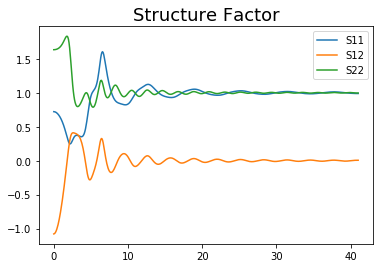

In [70]:
plt.plot(set_of_ks, S11, label = "S11")
plt.plot(set_of_ks, S12, label = "S12")
plt.plot(set_of_ks, S22, label = "S22")
plt.title("Structure Factor", size = 18)
plt.legend()
plt.show()